<a href="https://colab.research.google.com/github/sharmajee499/Sandesh_OR_German_Shepherd/blob/master/Sandesh_OR_GermanShepherd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is the Binary Image Classification in which the classes are Sandesh and German Shepherd.**

In [55]:
#importing the necessary libraries
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import random

**Making the respective directory to store the training and validation dataset**
> *The files are already uploaded in the Google Drive as the folder 'german_shepherd' and 'Me'.*



In [ ]:
#making the directory for the training and validating datasets
os.mkdir('/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/training')
os.mkdir('/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/validation')

#for training data
os.mkdir('/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/training/sandesh')
os.mkdir('/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/training/german_shepherd')

#for validating the data
os.mkdir('/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/validation/sandesh')
os.mkdir('/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/validation/german_shepherd')

**This function creates the training and validating data and store in the directory that was created above, with the data and specified spiliting percentage.** 

In [ ]:
def split_data(source, training, validate, split_size):

  #get the number of files presented in the source dir
  no_samples=len(os.listdir(source))

  #spliting the source with given split percentage
  split_num= int(no_samples* split_size)

  #shuffling the images
  source_image= random.sample(os.listdir(source), no_samples)

  #copying the files in the respective directory training data
  for each in source_image[0:split_num]:
    shutil.copyfile(os.path.join(source,each), os.path.join(training,each))

  #copying the remaining files for validation
  for i in source_image[split_num:]:
    shutil.copyfile(os.path.join(source,i), os.path.join(validate,i))
  

**Applying the `'split_data()'` function to make two classes of training and validating data.**

In [56]:
#defing the directory for the training and validation to pass in the split_data function

source_german_she_dir= '/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/German_Shep'
training_german_dir="/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/training/german_shepherd"
validation_german_dir= '/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/validation/german_shepherd'

source_sand_dir='/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/Me'
trining_sand_dir='/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/training/sandesh'
validation_sand_dir='/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/validation/sandesh'

# split_data(source_german_she_dir,training_german_dir,validation_german_dir, 0.8)

In [ ]:
#split_data(source_sand_dir, trining_sand_dir, validation_sand_dir, 0.8)

**Displaying the number of files in each validating and training folder**

In [57]:
print(len(os.listdir('/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/training/german_shepherd')),'Number of German Sepherd  Training Images')
print(len(os.listdir('/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/training/sandesh')), 'Number of Sandesh Training Images')

print(len(os.listdir('/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/validation/german_shepherd')),'Number of German Sepherd Validation Images')
print(len(os.listdir('/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/validation/sandesh')),'Number of Sandesh Validation Images')

92 Number of German Sepherd  Training Images
80 Number of Sandesh Training Images
23 Number of German Sepherd Validation Images
20 Number of Sandesh Validation Images


**Displaying the Sample Images from Training Set**


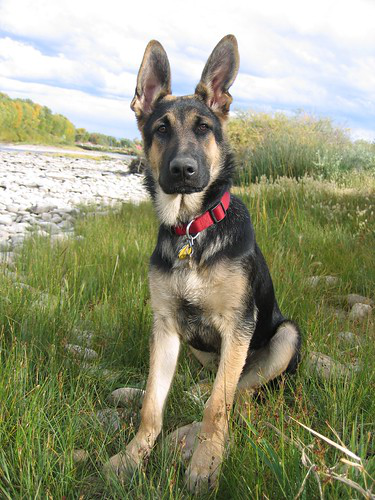

<Figure size 432x288 with 0 Axes>

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image

for i in (random.sample(os.listdir(training_german_dir),1)):
  plt.figure()
  display(Image.open(os.path.join(training_german_dir,i))) 
  plt.show() 



In [ ]:
#the picture of Sandesh is preety big. It is not compressed. It will be compressed before processing.
for i in (random.sample(os.listdir(trining_sand_dir),1)):
  plt.figure()
  display(Image.open(os.path.join(trining_sand_dir,i))) 
  plt.show() 


**Defing a CallBack function to stop the early training after it reached certain accuracy.**

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

myCallback= EarlyStopping(monitor='val_loss',
                          min_delta=1e-3,
                          patience=5,
                          verbose=3,
                          mode='auto',
                          baseline=None,
                          restore_best_weights=True)

#More Details on : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

#Another Callback
class myCallback2(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>float(0.90)):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

**Image Generator**

In [60]:
#train data generator with image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1.0/255.0
                                  ,rotation_range= 40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True
)

#validation data generator. And it is not augmented
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

**Flowing the Training and Validation Data from the datagen**

In [61]:
#directory for the training and validation data
train_dir="/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/training"
validation_dir= '/content/drive/My Drive/Sandes_vs_Geman_Sep_CNN/validation'

train_generator= train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))

validation_generator= validation_datagen.flow_from_directory(validation_dir,
                                                             batch_size=20,
                                                             class_mode='binary',
                                                             target_size=(150,150))
print('Classes : ',train_generator.class_indices)

Found 172 images belonging to 2 classes.
Found 43 images belonging to 2 classes.
Classes :  {'german_shepherd': 0, 'sandesh': 1}


**Building the Model**

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
#Making the Convulation and then Dense Layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Optimizing the model
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# from keras.optimizers import SGD
# opt = SGD(lr=0.01)
# model.compile(optimizer='SGD',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['acc'])

#Summary of the model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 128)      

**Fitting the Model**

In [66]:
history= model.fit(train_generator,
                  epochs=30,
                  validation_data= validation_generator,
                  callbacks=myCallback2()
                  )
model.save('san_or_dog_wo_data_aug.h5')

Epoch 1/30
9/9 [==============================] - 15s 2s/step - loss: 0.6851 - accuracy: 0.5523 - val_loss: 0.6872 - val_accuracy: 0.5116
Epoch 2/30
9/9 [==============================] - 16s 2s/step - loss: 0.6953 - accuracy: 0.4942 - val_loss: 0.6869 - val_accuracy: 0.5349
Epoch 3/30
9/9 [==============================] - 17s 2s/step - loss: 0.6884 - accuracy: 0.4884 - val_loss: 0.7011 - val_accuracy: 0.5349
Epoch 4/30
9/9 [==============================] - 16s 2s/step - loss: 0.6918 - accuracy: 0.4826 - val_loss: 0.6705 - val_accuracy: 0.6512
Epoch 5/30
9/9 [==============================] - 15s 2s/step - loss: 0.6829 - accuracy: 0.5872 - val_loss: 0.6685 - val_accuracy: 0.6512
Epoch 6/30
9/9 [==============================] - 18s 2s/step - loss: 0.6599 - accuracy: 0.5930 - val_loss: 0.6936 - val_accuracy: 0.5581
Epoch 7/30
9/9 [==============================] - 16s 2s/step - loss: 0.6460 - accuracy: 0.6337 - val_loss: 0.6490 - val_accuracy: 0.6744
Epoch 8/30
9/9 [==================

In [68]:
model.save('/content/drive/My Drive/Colab Notebooks/san_or_dog_wo_data_aug.h5')

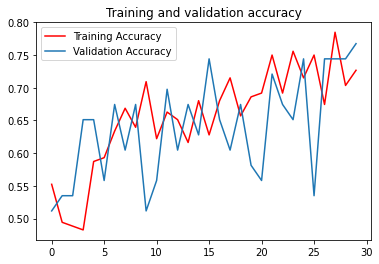

<Figure size 432x288 with 0 Axes>

In [69]:
#extracting the accuracy information from the model
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
epochs= range(len(acc))

#plotting the graph
import matplotlib.pyplot as plt

plt.plot(epochs, acc,'r', label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

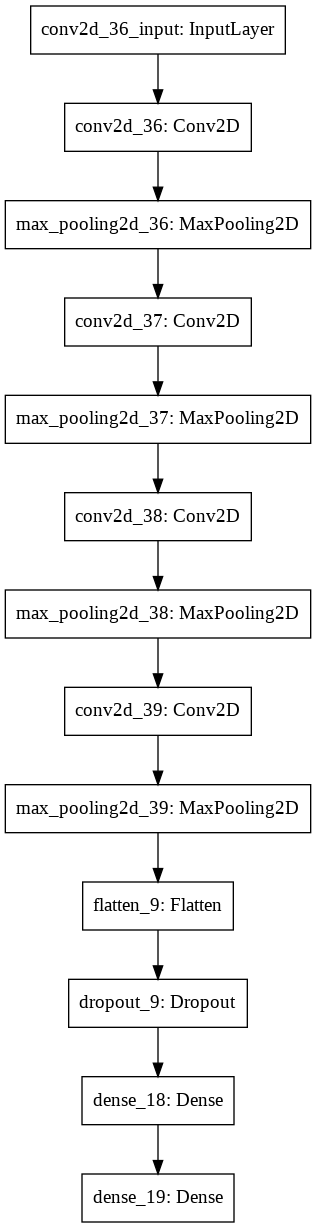

In [70]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

**The above model is doing alright. The training accuracy and the validation accuracy was all same but is low i.e. 72%. However, with the validation accuracy of 76% it's regularized well. So, below I used the transfer lerning. I used 'InceptionV3' for the transfer learning. This model has also performed well in the other images that I uploded from pc.**

In [ ]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
#local_weights_file = path_inception

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                               include_top=False
                              #  ,weights='imagenet'
)



# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layers.trainable=False
  
# Print the model summary
pre_trained_model.summary()

In [74]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


**Making the Tranfer learning Model**

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model2 = Model(pre_trained_model.input, x) 

model2.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.summary()

**Fitting the Transfer Learning Model**

In [76]:
history2 = model2.fit_generator(train_generator,
                             validation_data=validation_generator,
                             epochs=15,
                             callbacks=myCallback2()
                             )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
9/9 [==============================] - 18s 2s/step - loss: 0.6934 - accuracy: 0.7035 - val_loss: 0.1475 - val_accuracy: 0.9767
Epoch 2/15
9/9 [==============================] - ETA: 0s - loss: 0.1344 - accuracy: 0.9535
Reached 99% accuracy so cancelling training!
9/9 [==============================] - 18s 2s/step - loss: 0.1344 - accuracy: 0.9535 - val_loss: 0.0292 - val_accuracy: 0.9767


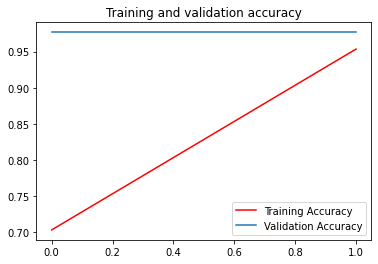

<Figure size 432x288 with 0 Axes>

In [79]:
#extracting the accuracy information from the model
acc= history2.history['accuracy']
val_acc= history2.history['val_accuracy']
epochs= range(len(acc))

#plotting the graph
import matplotlib.pyplot as plt

plt.plot(epochs, acc,'r', label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()


The classifier does preety good. However, the data is far less then what a DNN is supposed to be fed. DNN are powerful. But, it needs huge amount of data to unleash it power. The clssifier did some good on the validation data but it failed on some the real images that i uploded from the disk. 

**Predicting with the Real Images from Drive**

In [88]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(fn)
  print(classes)

Saving san2.jpg to san2 (1).jpg
san2.jpg
[[1.]]
